In [1]:
from OF_trigger import *
from tools import *
import matplotlib.pyplot as plt
import numpy as np


sampling_frequency = 3906250


template = np.load("../templates/template_K_alpha_no_baseline.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")
trace_path = "/ceph/dwong/trigger_samples/traces_energy_0.zst"
# Parameters

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)

In [2]:
loaded_traces = load_traces_from_zstd(trace_path, n_traces=1000)


In [3]:
loaded_traces.shape

(1000, 54, 32768)

In [6]:
n_sets = 1000
of_amplitudes_all = []
chisq_all = []

for i in range(n_sets):
    for trace in loaded_traces[i]:
        of_val, chisq = trigger.fit(trace)
        of_amplitudes_all.append(of_val)
        chisq_all.append(chisq)

of_amplitudes_all = np.array(of_amplitudes_all)
chisq_all = np.array(chisq_all)


In [ ]:
of_amplitudes_all.shape

(54000,)

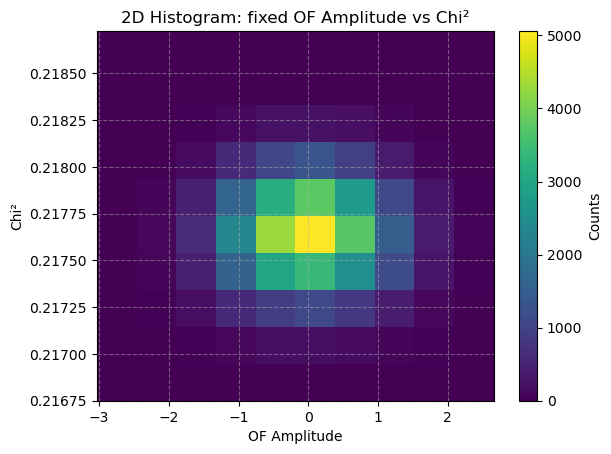

In [7]:
# Re-import necessary modules after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Plot 2D histogram
plt.hist2d(of_amplitudes_all, chisq_all, bins=10, cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel('OF Amplitude')
plt.ylabel('Chi²')
plt.title('2D Histogram: fixed OF Amplitude vs Chi²')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


OF Amplitude:
  Mean: -0.0012
  Std:  0.7674
  Min:  -3.0326
  Max:  2.6602

Chi²:
  Mean: 0.2176
  Std:  0.0002
  Min:  0.2167
  Max:  0.2187


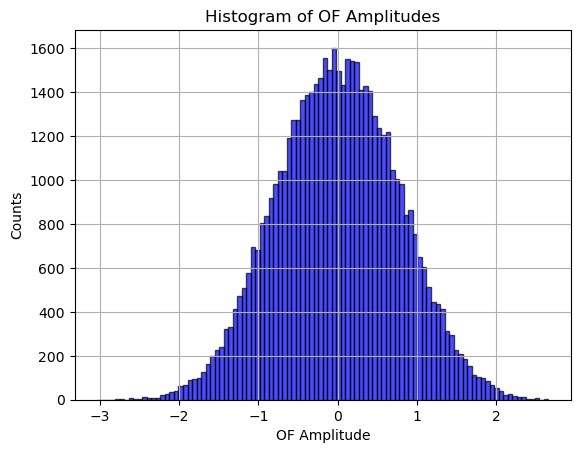

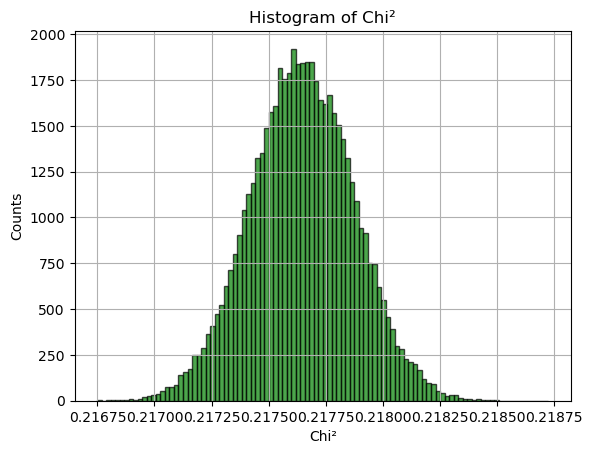

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assume of_amplitudes_all and chisq_all are already defined
# Example: of_amplitudes_all = np.array([...])
#          chisq_all = np.array([...])

# --- Basic Statistics ---
print("OF Amplitude:")
print(f"  Mean: {np.mean(of_amplitudes_all):.4f}")
print(f"  Std:  {np.std(of_amplitudes_all):.4f}")
print(f"  Min:  {np.min(of_amplitudes_all):.4f}")
print(f"  Max:  {np.max(of_amplitudes_all):.4f}")

print("\nChi²:")
print(f"  Mean: {np.mean(chisq_all):.4f}")
print(f"  Std:  {np.std(chisq_all):.4f}")
print(f"  Min:  {np.min(chisq_all):.4f}")
print(f"  Max:  {np.max(chisq_all):.4f}")

# --- Histogram: OF Amplitude ---
plt.figure()
plt.hist(of_amplitudes_all, bins=100, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of OF Amplitudes")
plt.xlabel("OF Amplitude")
plt.ylabel("Counts")
plt.grid(True)

# --- Histogram: Chi² ---
plt.figure()
plt.hist(chisq_all, bins=100, color='green', alpha=0.7, edgecolor='black')
plt.title("Histogram of Chi²")
plt.xlabel("Chi²")
plt.ylabel("Counts")
plt.grid(True)

plt.show()


/tmp/ipykernel_1501535/2662908098.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


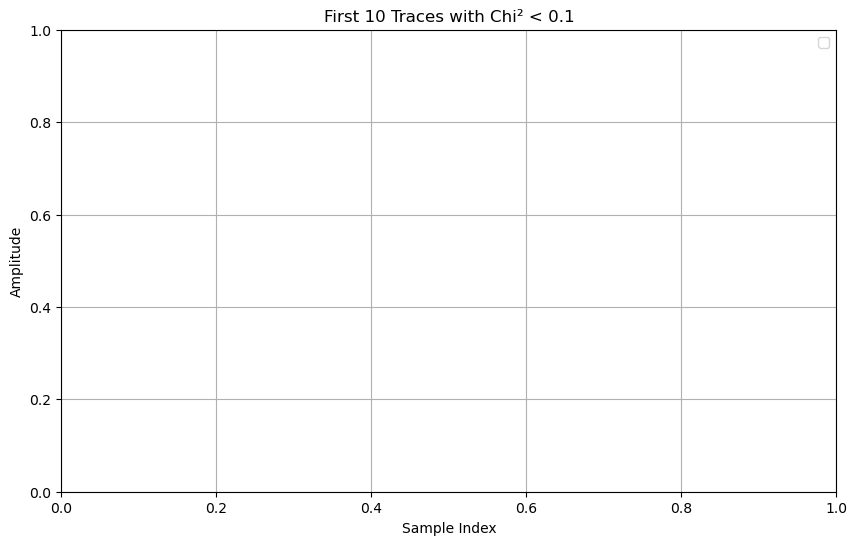

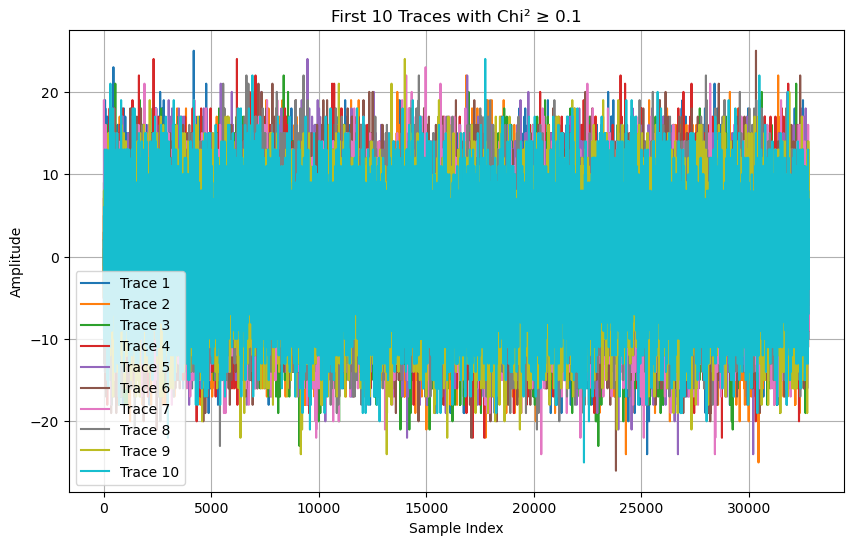

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Flatten all traces into a single list (if not already flat)
all_traces = [trace for group in loaded_traces for trace in group]

# Step 2: Convert to NumPy array for easier indexing
all_traces = np.array(all_traces)

# Step 3: Convert OF and chi² lists to arrays (already done)
of_amplitudes_all = np.array(of_amplitudes_all)
chisq_all = np.array(chisq_all)

# Step 4: Create masks based on chi² threshold
mask_low_chi2 = chisq_all < 0.1
mask_high_chi2 = chisq_all >= 0.1

# Step 5: Apply masks to get trace groups
traces_low_chi2 = all_traces[mask_low_chi2]
traces_high_chi2 = all_traces[mask_high_chi2]

# Step 6: Plot first 10 traces from each group
def plot_traces(traces, title):
    plt.figure(figsize=(10, 6))
    for i in range(min(10, len(traces))):
        plt.plot(traces[i], label=f"Trace {i+1}")
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_traces(traces_low_chi2, "First 10 Traces with Chi² < 0.1")
plot_traces(traces_high_chi2, "First 10 Traces with Chi² ≥ 0.1")
